## R Plot 종류

<br>

- 그래프 중첩해서 그리기?
    - **par(new=TRUE)** 사용

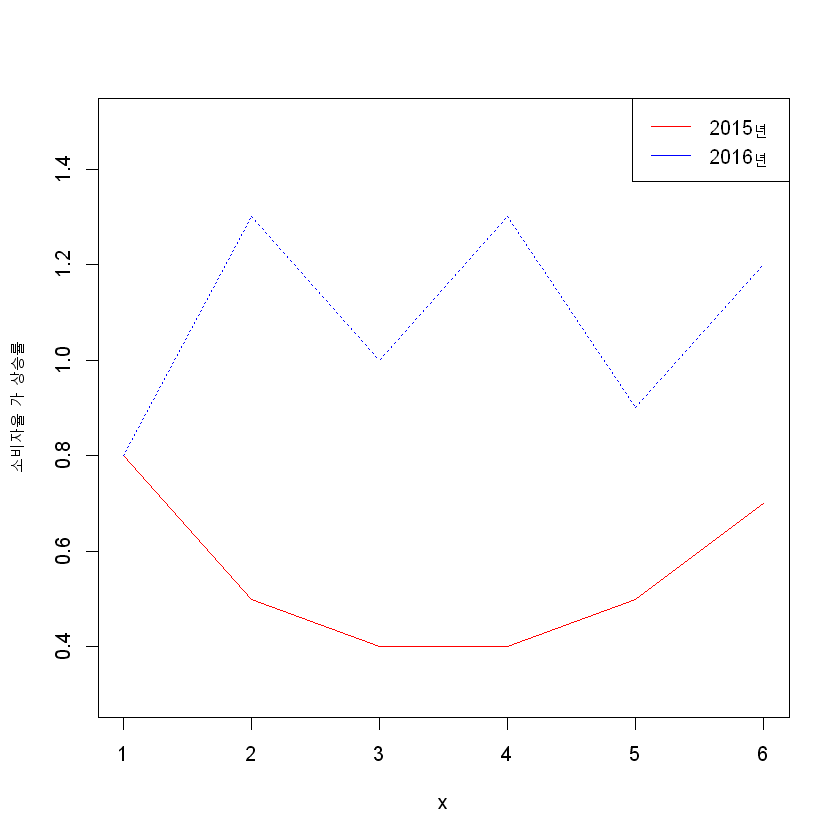

In [7]:
y1 <- c(0.8, 0.5, 0.4, 0.4, 0.5, 0.7)
y2 <- c(0.8, 1.3, 1.0, 1.3, 0.9, 1.2)
x <- c(1:6)

plot.new()
# 중첩해서 그리기
par(new=TRUE)
plot(x, y1, ylab='소비자율 가 상승률', type='l', col='red', ylim=c(0.3, 1.5))

par(new=TRUE)
plot(x, y2, ylab='소비자율 가 상승률', lty='dotted', type='l', col='blue', ylim=c(0.3, 1.5))

# locator(1) 을 사용하면 범례를 사용자가 클릭하는 지점에 띄워줌. R console 얘기인듯.
legend('topright', legend=c('2015년', '2016년'), lty=1, bg='white', col=c('red', 'blue'))

### 막대그래프

<br>

- barplot(인자) 를 통해 생성.
    - names : 막대 라벨 표시
    - space : 막대와 막대 사이 간격
    - beside : TRUE로 하면 각각의 값 마다 막대를 그림. 그룹화 할때 많이 씀.
    - horiz : TRUE로 하면 막대를 가로형으로(수평으로) 표시.

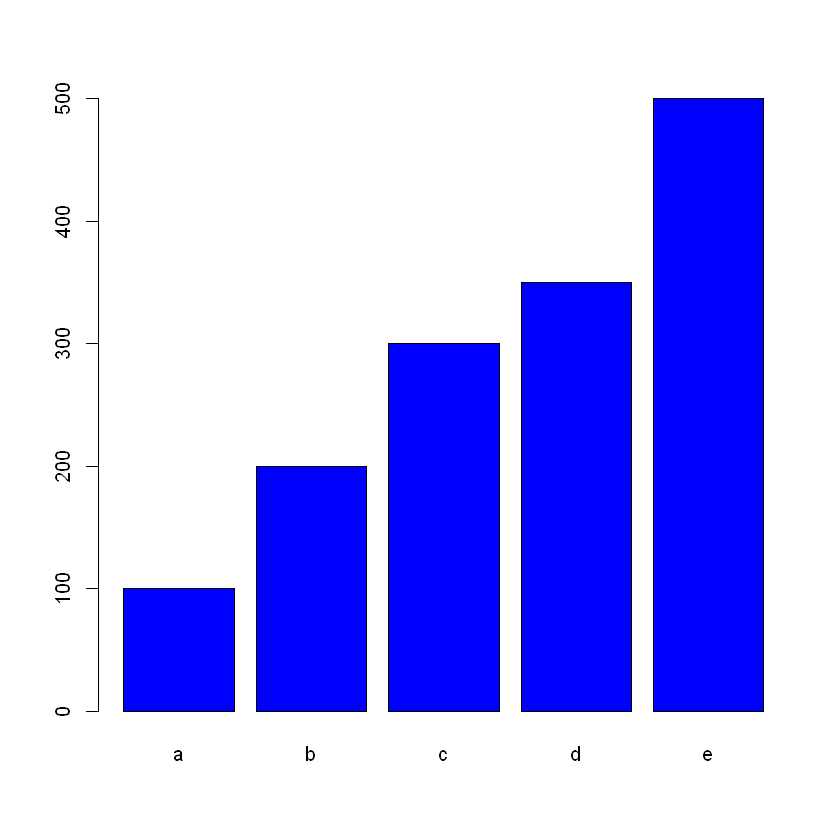

In [12]:
a <- c(100, 200, 300, 350, 500)
barplot(a, names=c('a', 'b', 'c', 'd', 'e'), col='blue')

In [18]:
# csv파일을 읽어서
data <- read.csv('UseData/seoulpopulation.csv', sep=',', header=TRUE)
data

자치구,남자,여자
종로구,80531,83291
중구,66755,67574
용산구,121027,126882
성동구,151459,153606
광진구,183436,191744
동대문구,185827,187997
중랑구,208393,210227
성북구,229183,240377
강북구,164337,170089
도봉구,173804,179437


In [19]:
# 남자 수가 23만명 이상인 구 만을 subset함수를 사용해 골라냄.
data1 <- subset(data, 남자>=230000)
data1

,자치구,남자,여자
11,노원구,281538,296683
12,은평구,244964,257614
15,양천구,242074,246936
16,강서구,291216,304475
21,관악구,266773,262258
23,강남구,279209,302551
24,송파구,325950,341530
25,강동구,230851,232470


In [20]:
# 해당 구의 이름만을 저장한 vector 추출
gu <- data1$자치구
gu

[1] 노원구 은평구 양천구 강서구 관악구 강남구 송파구 강동구
25 Levels: 강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 ... 중랑구

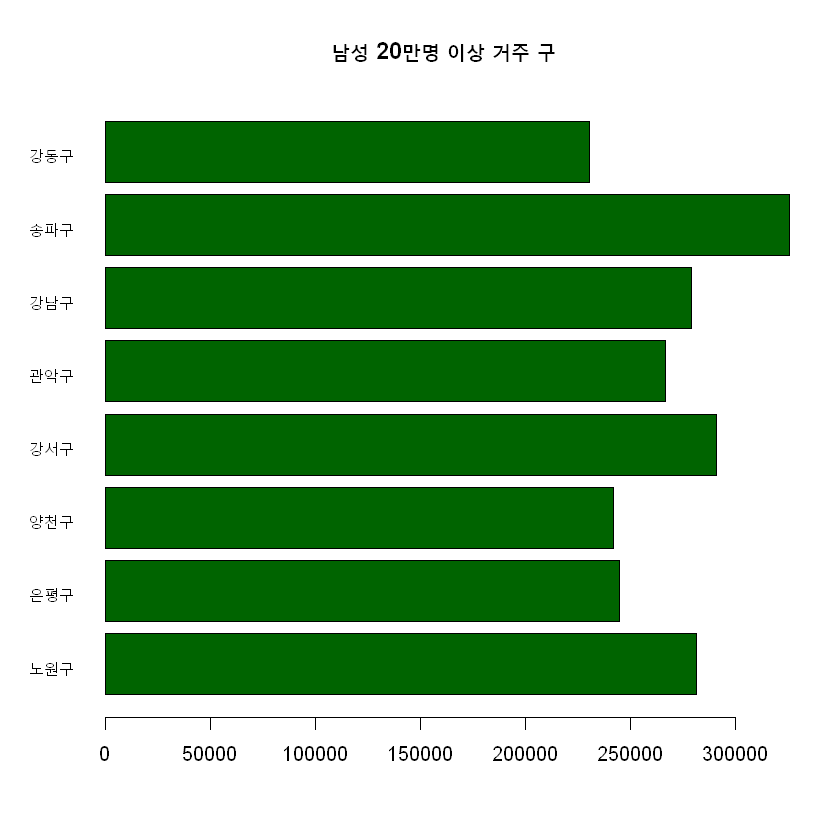

In [22]:
# 추출한 내용을 바탕으로 남성이 20만명 이상 거주하는 구 만을 시각화.
barplot(data1$남자, names.arg = gu, las = 1, col = 'darkgreen', horiz = TRUE, main = '남성 20만명 이상 거주 구')

**그룹화 된 막대형 그래프?**

자치구,남자,여자,total
종로구,80531,83291,163822
중구,66755,67574,134329
용산구,121027,126882,247909
성동구,151459,153606,305065
광진구,183436,191744,375180
동대문구,185827,187997,373824
중랑구,208393,210227,418620
성북구,229183,240377,469560
강북구,164337,170089,334426
도봉구,173804,179437,353241


,자치구,남자,여자,total
11,노원구,281538,296683,578221
12,은평구,244964,257614,502578
16,강서구,291216,304475,595691
21,관악구,266773,262258,529031
23,강남구,279209,302551,581760
24,송파구,325950,341530,667480


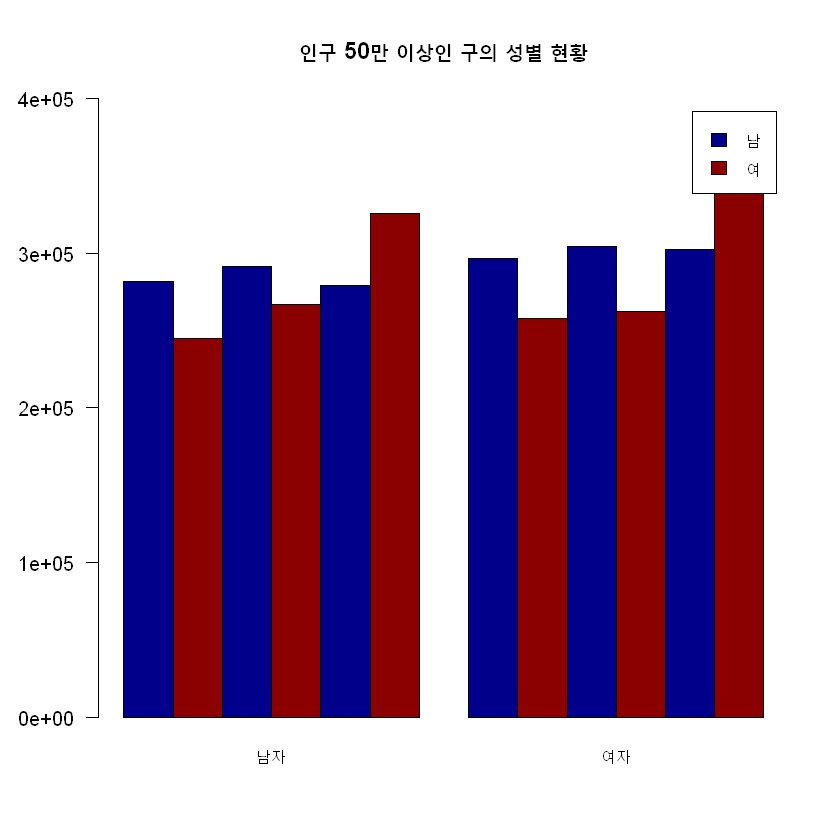

In [28]:
data <- read.csv('UseData/seoulpopulation.csv', sep=',', header=TRUE)

# 해당 행의 남자/여자 열 중심으로 sum을 함.
total <- rowSums(data[, c('남자', '여자')], na.rm=TRUE)

# 계산한 것 추가.
data <- cbind(data, total)
data

# 총 인구가 50만 이상인 것만 골라내기
data1 <- subset(data, total>=500000)
data1

# 남자, 여자 항목에 대한 막대그래프 그리기
# 행렬로 남자/여자만 가져오기. (1행부터 6행까지, 2열과 3열)
# 행렬의 요소 각각을 전부 막대 그래프로 그려준다. beside=TRUE
# las=1을 통해 글자를 안눕힐 수 있음.
barplot(as.matrix(data1[1:6, 2:3]), legend=c('남', '여'), beside=TRUE, las=1,col=c('darkblue', 'darkred'),
        main='인구 50만 이상인 구의 성별 현황', ylim=c(0, 400000))

### 히스토그램

<br>

- 도수 분포를 보고자 할 때 그리는 차트.
- **hist(인자)** 이용.
    - 대부분의 인자는 이전에 본 인자들과 거의 일치.

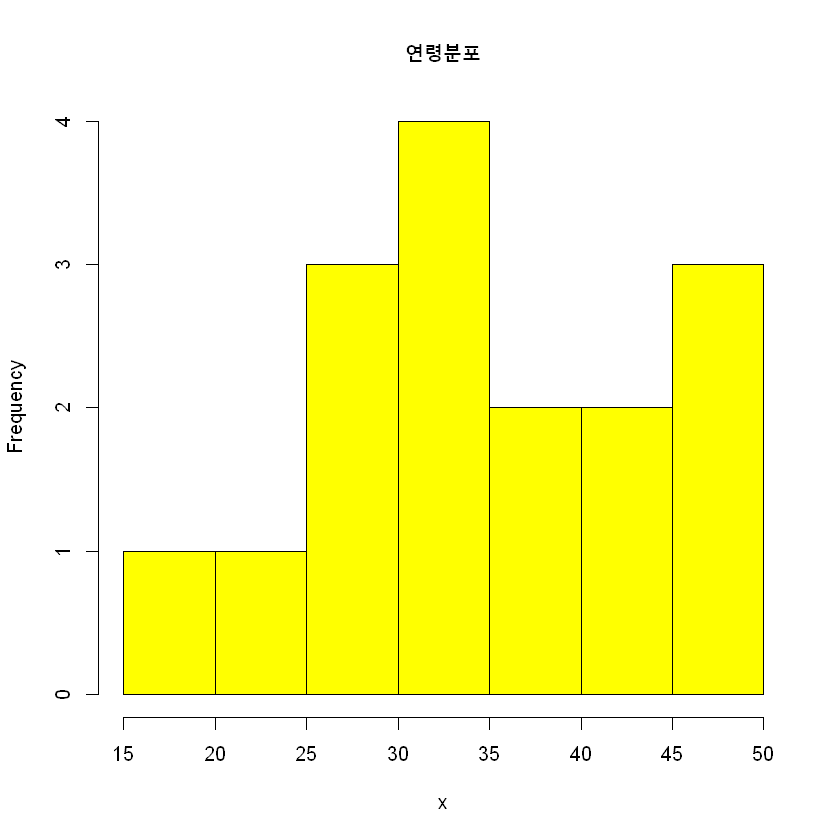

In [33]:
x <- c(23, 33, 32, 45, 37, 28, 15, 35, 43, 27, 46, 33, 38, 49, 50, 29)
hist(x, main='연령분포', xlim=c(15, 50), col='yellow')

### 상자 도표

<br>

- 서로 다른 종류의 데이터 범위를 비교할 수 있게 하는 시각화.
- 데이터 집합 범위, 사분위수 범위, 중위수, 이상치 등을 알 수 있음.
- **boxplot(인자)** 를 통해 생성.

월별,출생,사망
2013-01,8530,3830
2013-02,7045,3464
2013-03,7316,3809
2013-04,7162,3417
2013-05,6843,3469
2013-06,6486,3159
2013-07,6833,3324
2013-08,7031,3426
2013-09,7056,3371
2013-10,6945,3655


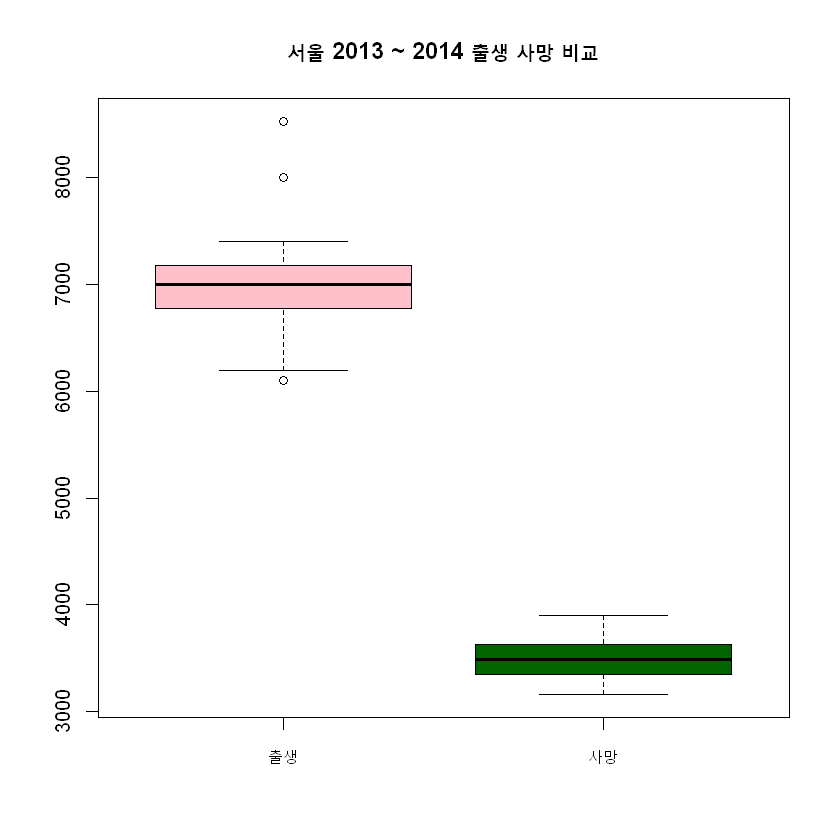

In [38]:
data <- read.csv('UseData/birthdie.csv', sep=',', header=TRUE)
data
boxplot(data$출생, data$사망, names=c('출생', '사망'), col=c('pink', 'darkgreen'),
        main='서울 2013 ~ 2014 출생 사망 비교')

    수염의 길이가 길다는 소리는 편차가 크다는 소리. 자명.

### 원형 그래프 

<br>

- 단순히 **pie(인자)** 사용하면 됨.

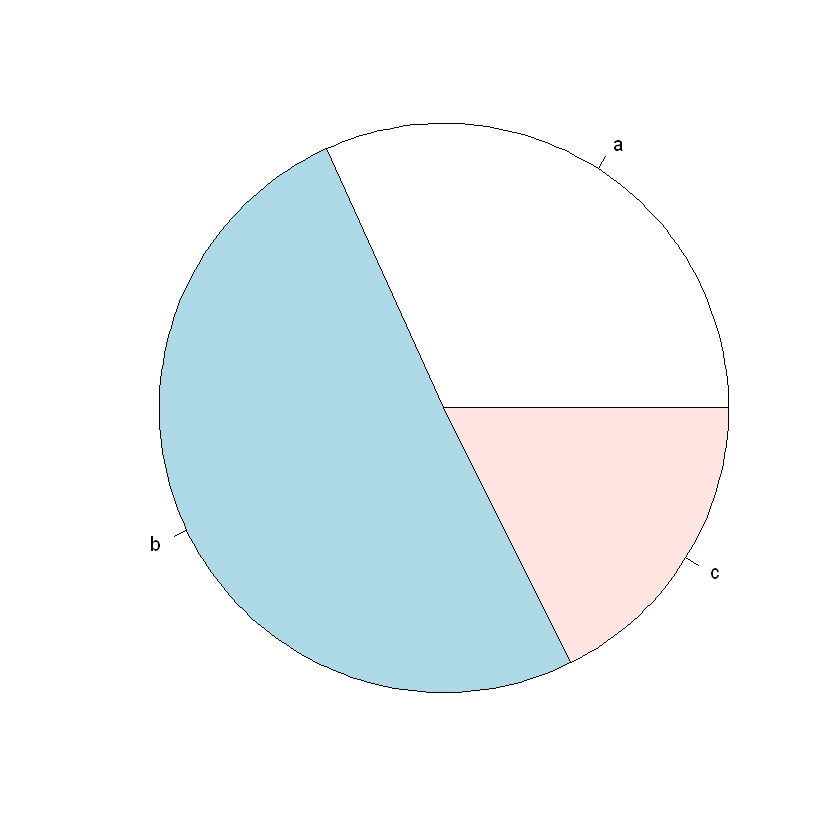

In [39]:
x <- c(27, 43, 15)

# radius : 원 크기 지정
# labels : 각각의 데이터 이름 지정
pie(x, radius=1, labels=c('a', 'b', 'c'))